# Setup

In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
training = pd.read_csv('./playground-series-s5e11/train.csv', index_col='id')
testing = pd.read_csv('./playground-series-s5e11/test.csv', index_col='id')

training.head(5)

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
id,,,,,,,,,,,,
0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


In [4]:
training.shape

(593994, 12)

# EDA

In [5]:
training.info()
training.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
Index: 593994 entries, 0 to 593993
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   annual_income         593994 non-null  float64
 1   debt_to_income_ratio  593994 non-null  float64
 2   credit_score          593994 non-null  int64  
 3   loan_amount           593994 non-null  float64
 4   interest_rate         593994 non-null  float64
 5   gender                593994 non-null  object 
 6   marital_status        593994 non-null  object 
 7   education_level       593994 non-null  object 
 8   employment_status     593994 non-null  object 
 9   loan_purpose          593994 non-null  object 
 10  grade_subgrade        593994 non-null  object 
 11  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 58.9+ MB


,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
count,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994,593994,593994,593994,593994,593994,593994.000000
unique,NaN,NaN,NaN,NaN,NaN,3,4,5,5,8,30,NaN
top,NaN,NaN,NaN,NaN,NaN,Female,Single,Bachelor's,Employed,Debt consolidation,C3,NaN
freq,NaN,NaN,NaN,NaN,NaN,306175,288843,279606,450645,324695,58695,NaN
mean,48212.202976,0.120696,680.916009,15020.297629,12.356345,NaN,NaN,NaN,NaN,NaN,NaN,0.798820
std,26711.942078,0.068573,55.424956,6926.530568,2.008959,NaN,NaN,NaN,NaN,NaN,NaN,0.400883
min,6002.430000,0.011000,395.000000,500.090000,3.200000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,27934.400000,0.072000,646.000000,10279.620000,10.990000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
50%,46557.680000,0.096000,682.000000,15000.220000,12.370000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
75%,60981.320000,0.156000,719.000000,18858.580000,13.680000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


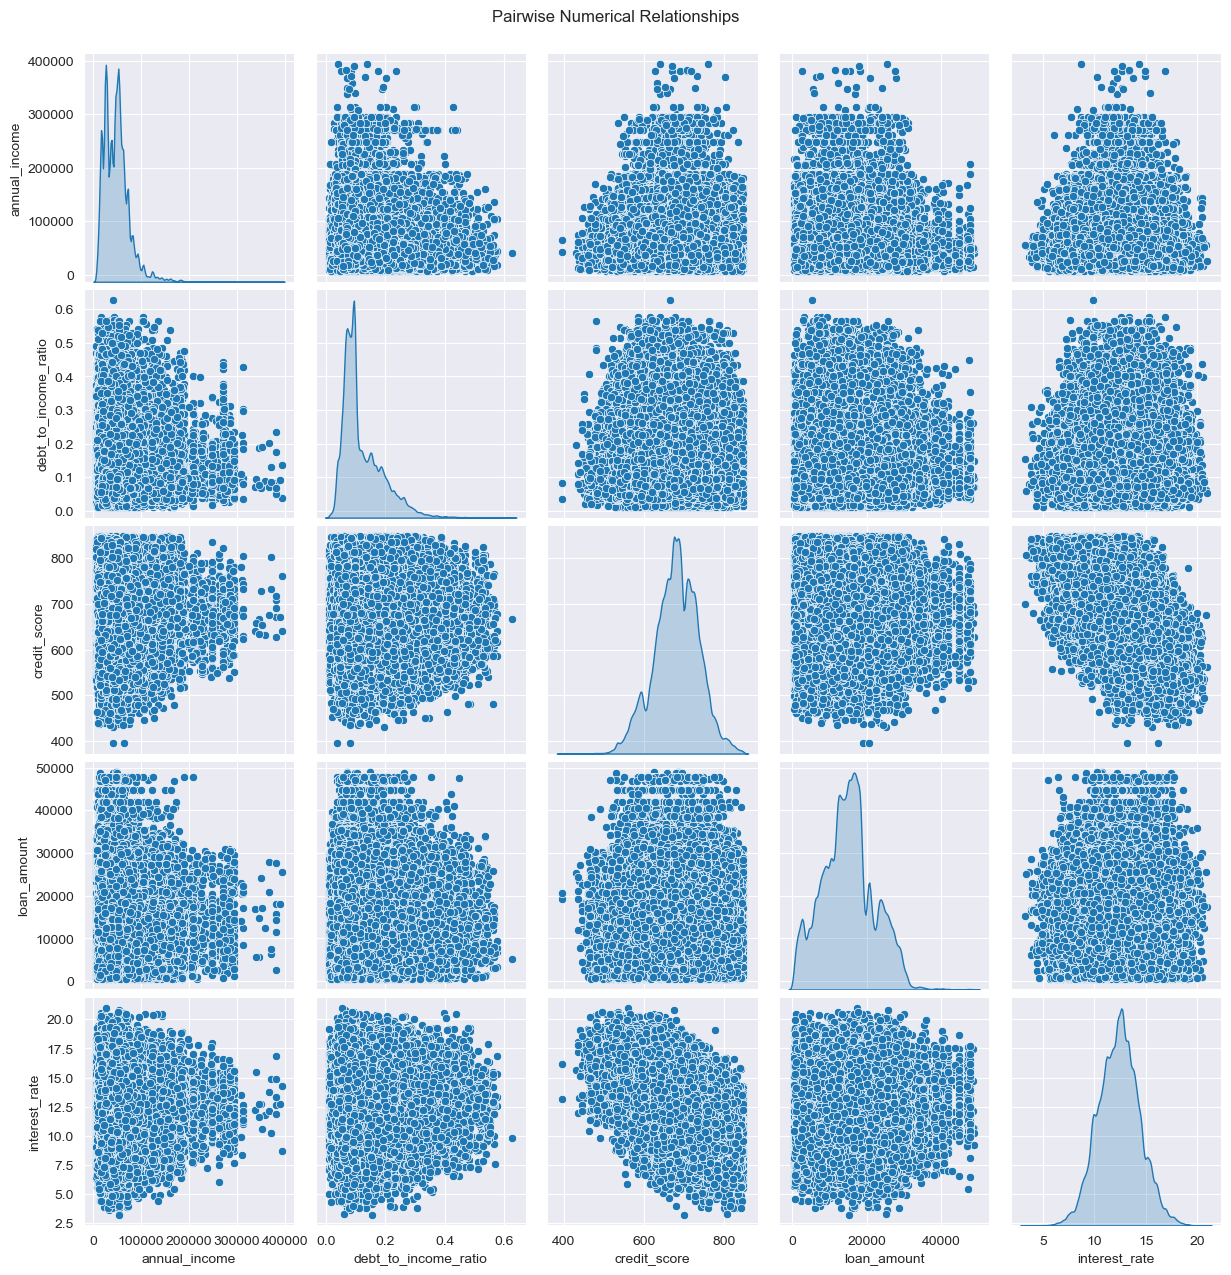

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate
annual_income,1.000000,0.000553,0.001509,-0.003407,-0.002507
debt_to_income_ratio,0.000553,1.000000,-0.061617,-0.008236,0.030316
credit_score,0.001509,-0.061617,1.000000,-0.005761,-0.538335
loan_amount,-0.003407,-0.008236,-0.005761,1.000000,-0.001174
interest_rate,-0.002507,0.030316,-0.538335,-0.001174,1.000000


In [6]:
numerical_vars = ["annual_income","debt_to_income_ratio","credit_score", "loan_amount", "interest_rate"]
sns.pairplot(training[numerical_vars], diag_kind="kde")
plt.suptitle("Pairwise Numerical Relationships", y=1.02)
plt.show()

training[numerical_vars].corr()

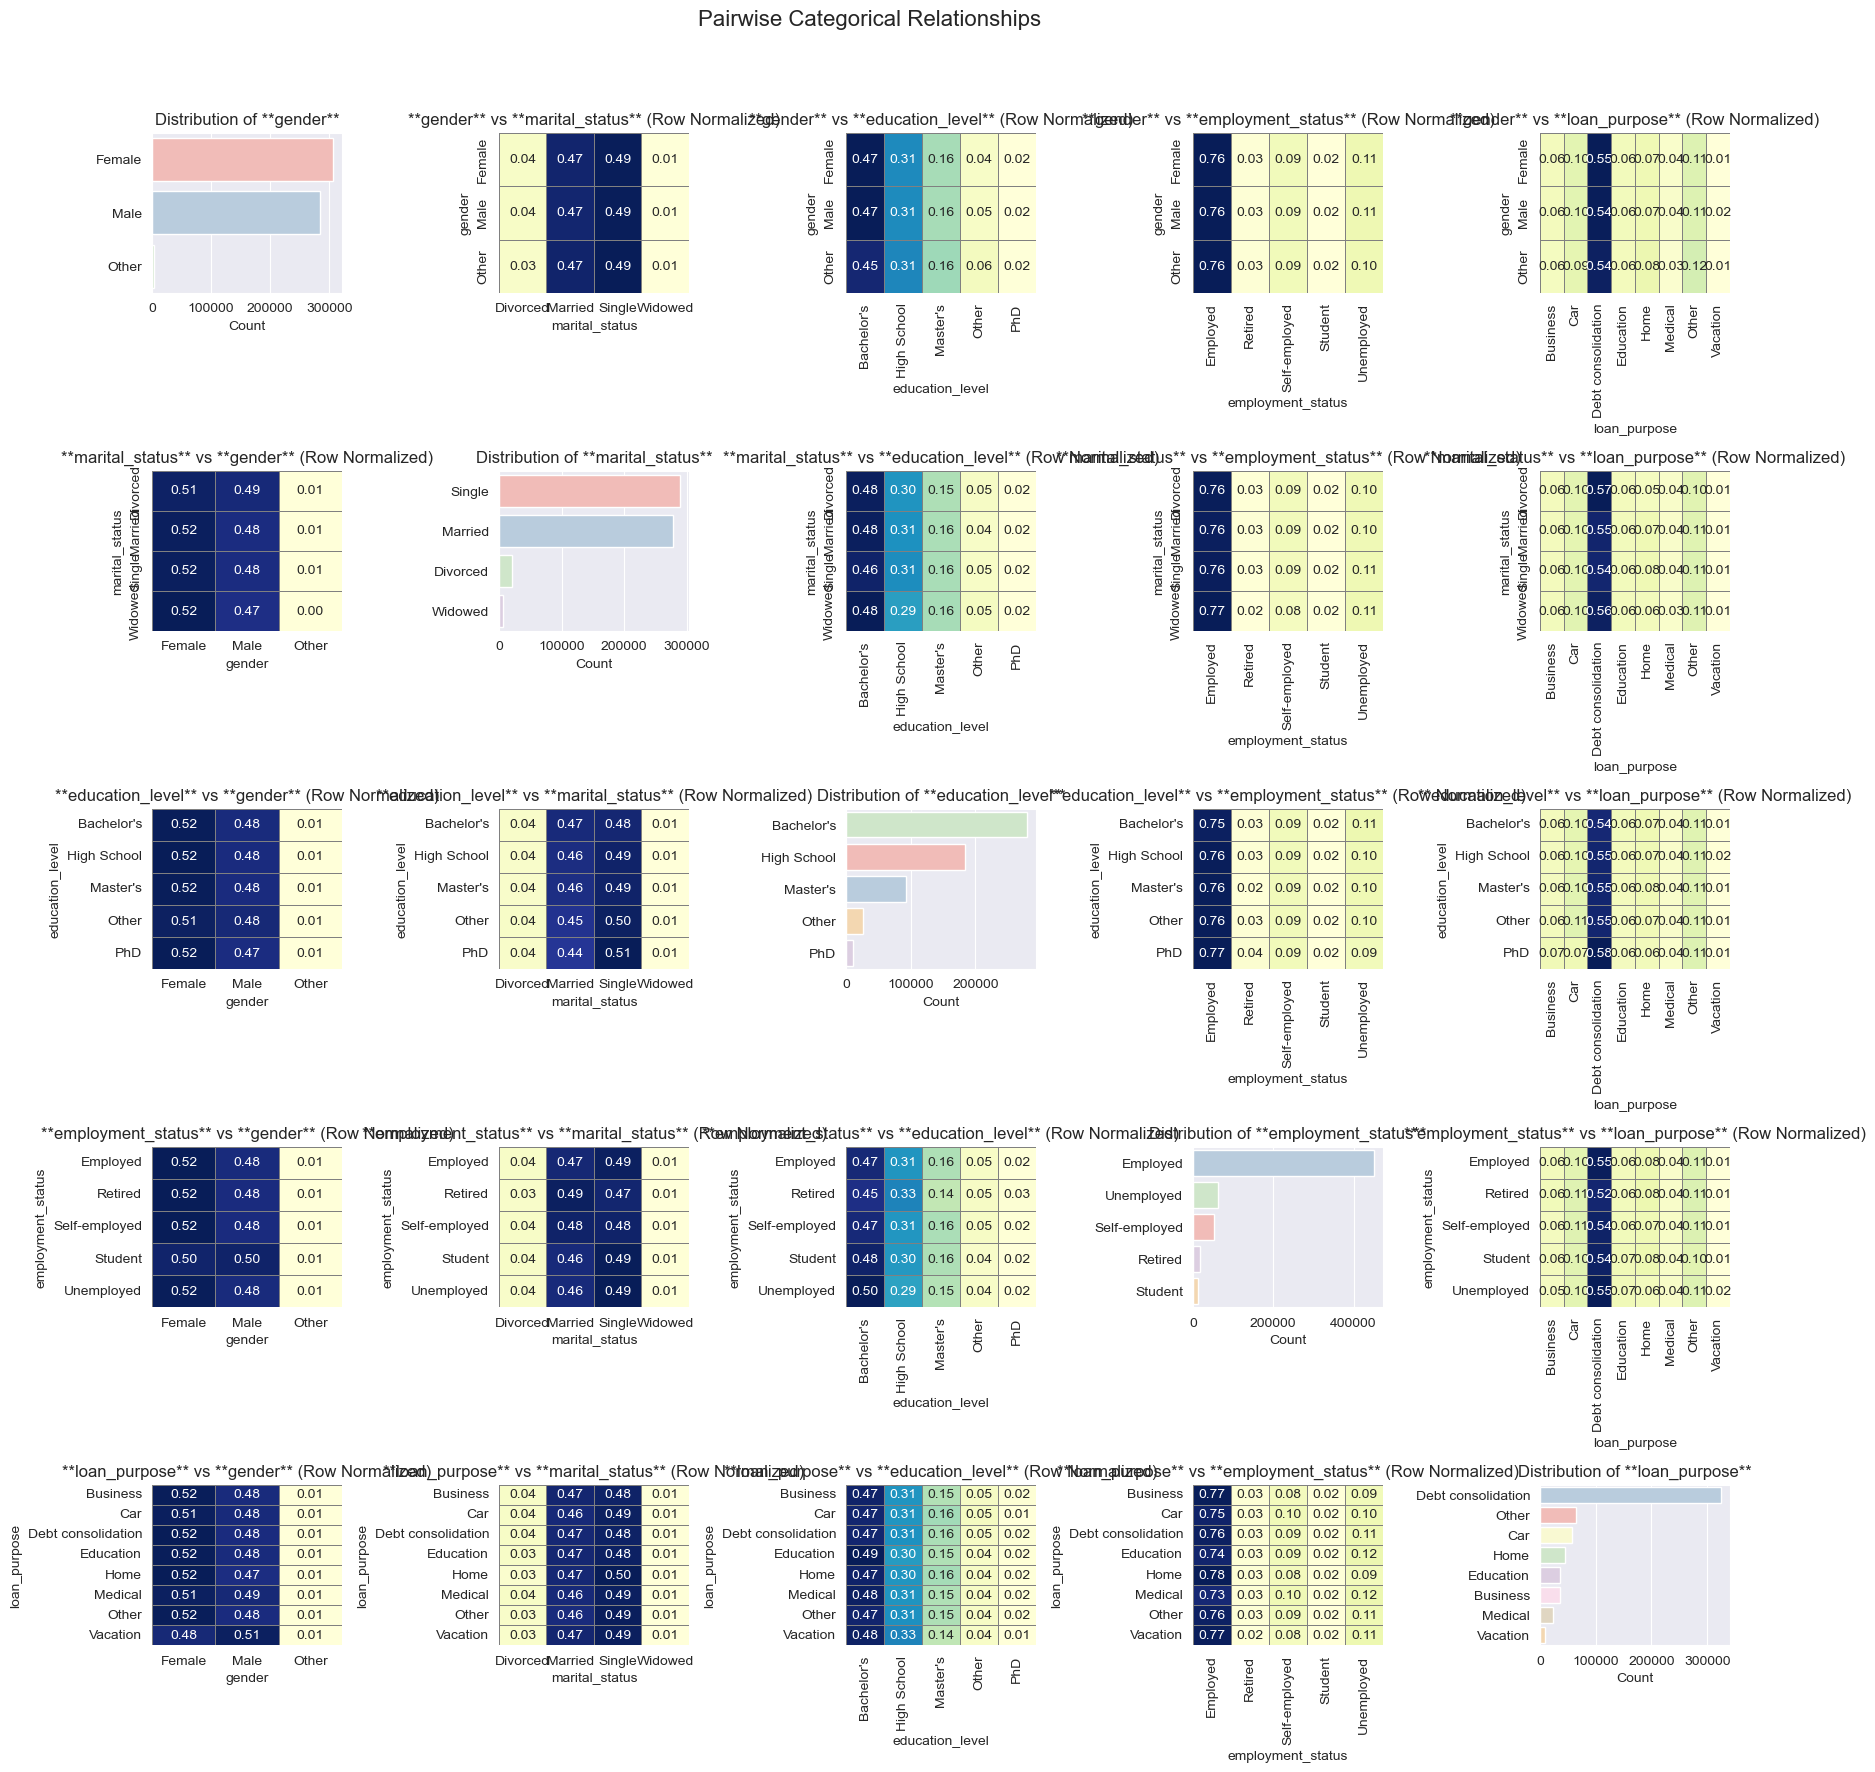

In [7]:
categorical_vars = ["gender","marital_status","education_level", "employment_status", "loan_purpose"]
n_categorical_vars = len(categorical_vars)

fig, axes = plt.subplots(n_categorical_vars, n_categorical_vars, figsize=(n_categorical_vars * 3.5, n_categorical_vars * 3.5))
plt.suptitle("Pairwise Categorical Relationships", y=1.01, fontsize=16)

for i in range(n_categorical_vars):
    for j in range(n_categorical_vars):
        var1 = categorical_vars[i]
        var2 = categorical_vars[j]

        # --- Diagonal (i == j): Individual Distribution (Count Plot) ---
        if i == j:
            # Use countplot to show the frequency of each category
            sns.countplot(
                y=training[var1],
                ax=axes[i, j],
                hue=training[var1],
                palette="Pastel1",
                order=training[var1].value_counts().index,
                legend=False
            )
            axes[i, j].set_title(f"Distribution of **{var1}**", fontsize=12)
            axes[i, j].set_ylabel("")
            axes[i, j].set_xlabel("Count")

        # --- Off-Diagonal (i != j): Pairwise Relationship (Heatmap) ---
        else:
            # 1. Create a contingency table (cross-tabulation)
            # Normalize='index' (row-wise) shows the distribution of var2 *within* each category of var1
            contingency_table = pd.crosstab(training[var1], training[var2], normalize='index')

            # 2. Plot the contingency table as a heatmap
            sns.heatmap(
                contingency_table,
                annot=True,
                fmt=".2f",
                cmap="YlGnBu",
                cbar=False,
                ax=axes[i, j],
                linewidths=.5,
                linecolor='gray'
            )
            axes[i, j].set_title(f"**{var1}** vs **{var2}** (Row Normalized)", fontsize=12)
            axes[i, j].set_ylabel(var1)
            axes[i, j].set_xlabel(var2)

# Improve layout spacing
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

# Splitting and Preparing the Data

In [8]:
def create_features(df):
    df = df.copy()
    # Ratio of Debt to Income is already there, let's make Income to Loan
    # Logic: People with high income relative to loan size are safer
    df['income_loan_ratio'] = df['annual_income'] / (df['loan_amount'] + 1)

    # Disposable Income Estimate
    # Logic: Income minus expected debt payments might be a better predictor
    df['disposable_income'] = df['annual_income'] * (1 - df['debt_to_income_ratio'])

    return df

training = create_features(training)
testing = create_features(testing)

In [9]:
from sklearn.model_selection import train_test_split

full_categorical_vars = categorical_vars + ["grade_subgrade"]
full_vars = numerical_vars + full_categorical_vars

X = training[full_vars]
y = training["loan_paid_back"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

X_train.shape, X_test.shape

((415795, 11), (178199, 11))

Because the data is skewed with very few people Defaulting on their loans, I need to make sure my training data is not bias. So I will use boostraping on my training data.

In [10]:
from sklearn.utils import resample

print(f"Original Train Counts:\n{y_train.value_counts()}")

train_data = pd.concat([X_train, y_train], axis=1)

majority = train_data[train_data.loan_paid_back == 1]
minority = train_data[train_data.loan_paid_back == 0]

minority_upsampled = resample(minority,
                              replace=True,
                              n_samples=len(majority),
                              random_state=42)

train_data_balanced = pd.concat([majority, minority_upsampled])
train_data_balanced = train_data_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

X_train = train_data_balanced.drop('loan_paid_back', axis=1)
y_train = train_data_balanced['loan_paid_back']

print(f"Balanced Train Counts:\n{y_train.value_counts()}")

Original Train Counts:
loan_paid_back
1.0    332392
0.0     83403
Name: count, dtype: int64
Balanced Train Counts:
loan_paid_back
0.0    332392
1.0    332392
Name: count, dtype: int64


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled_num = scaler.fit_transform(X_train[numerical_vars])
X_train_scaled_df = pd.DataFrame(
    X_train_scaled_num,
    columns=numerical_vars,
    index=X_train.index
)

X_test_scaled_num = scaler.transform(X_test[numerical_vars])
X_test_scaled_df = pd.DataFrame(
    X_test_scaled_num,
    columns=numerical_vars,
    index=X_test.index
)

Here I scaled the data since income is significantly larger than interest rate. I scale the data for all models

In [12]:
X_train_cat = pd.get_dummies(X_train[categorical_vars], drop_first=True)
X_test_cat = pd.get_dummies(X_test[categorical_vars], drop_first=True)

X_train_encoded_cat, X_test_encoded_cat = X_train_cat.align(
    X_test_cat,
    join='left',
    axis=1,
    fill_value=0
)

print(X_train_cat.shape, X_test_cat.shape)

X_train_cat = pd.concat([X_train_scaled_df, X_train_encoded_cat], axis=1)
X_test_cat = pd.concat([X_test_scaled_df, X_test_encoded_cat], axis=1)

(664784, 20) (178199, 20)


In [13]:
X_train_full = pd.get_dummies(X_train[full_categorical_vars], drop_first=True)
X_test_full = pd.get_dummies(X_test[full_categorical_vars], drop_first=True)

X_train_encoded_cat_full, X_test_encoded_cat_full = X_train_full.align(
    X_test_full,
    join='left',
    axis=1,
    fill_value=0
)

print(X_train_full.shape, X_test_full.shape)

X_train_full = pd.concat([X_train_scaled_df, X_train_encoded_cat_full], axis=1)
X_test_full = pd.concat([X_test_scaled_df, X_test_encoded_cat_full], axis=1)

(664784, 49) (178199, 49)


In [14]:
X_train_full.head()

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender_Male,gender_Other,marital_status_Married,marital_status_Single,marital_status_Widowed,...,grade_subgrade_E1,grade_subgrade_E2,grade_subgrade_E3,grade_subgrade_E4,grade_subgrade_E5,grade_subgrade_F1,grade_subgrade_F2,grade_subgrade_F3,grade_subgrade_F4,grade_subgrade_F5
0,0.235828,1.255886,0.968334,-0.240341,-2.164065,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,-0.618646,-0.563929,-0.165068,1.485890,-0.601779,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,-0.663634,0.300806,1.004315,0.208898,-0.105816,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,-0.686860,-0.512303,-0.848708,-0.382689,-0.229807,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.939451,0.210460,-0.039134,-1.195815,-1.137420,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


# Evaluation Function

In [15]:
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score, roc_curve, precision_recall_curve

def evaluate_and_graph(model, X_train, y_train, X_test, y_test, name, graph):
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    if hasattr(model, "predict_proba"):
        y_prob_test = model.predict_proba(X_test)[:, 1]
        y_prob_train = model.predict_proba(X_train)[:, 1]
    else:
        y_prob_test = model.decision_function(X_test)
        y_prob_train = model.decision_function(X_train)

    test_acc = accuracy_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_prob_test)
    test_ap = average_precision_score(y_test, y_prob_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    train_auc = roc_auc_score(y_train, y_prob_train)

    print(f"--- {name} ---")
    print(f"Train Accuracy: {train_acc:.4f} | Train AUC: {train_auc:.4f}")
    print(f"Test  Accuracy: {test_acc:.4f} | Test  AUC: {test_auc:.4f}")

    if (train_acc - test_acc) > 0.05:
         print("⚠️ Warning: Signs of Overfitting (Train is much better than Test)")
    else:
         print("✅ Model seems balanced")
    print("-" * 30)

    fpr, tpr, _ = roc_curve(y_test, y_prob_test)
    precision, recall, _ = precision_recall_curve(y_test, y_prob_test)

    if graph:
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))

        # --- Plot 1: ROC Curve ---
        axes[0].plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {test_auc:.3f}')
        axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
        axes[0].set_xlim([0.0, 1.0])
        axes[0].set_ylim([0.0, 1.05])
        axes[0].set_xlabel('False Positive Rate')
        axes[0].set_ylabel('True Positive Rate')
        axes[0].set_title(f'ROC Curve: {name}')
        axes[0].legend(loc="lower right")
        axes[0].grid(True, alpha=0.3)

        # --- Plot 2: Precision-Recall Curve ---
        # "No Skill" baseline is just the percentage of positive cases
        no_skill = y_test.mean()

        axes[1].plot(recall, precision, color='green', lw=2, label=f'Avg Precision = {test_ap:.3f}')
        axes[1].plot([0, 1], [no_skill, no_skill], color='navy', linestyle='--', label='No Skill')
        axes[1].set_xlim([0.0, 1.0])
        axes[1].set_ylim([0.0, 1.05])
        axes[1].set_xlabel('Recall')
        axes[1].set_ylabel('Precision')
        axes[1].set_title(f'PR Curve: {name}')
        axes[1].legend(loc="upper right")
        axes[1].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    return {
        "model": name,
        "accuracy": test_acc,
        "auc": test_auc,
        "average_precision": test_ap,
        "train_accuracy": train_acc,
        "train_auc": train_auc
    }

# Decision Trees (Gini and Entropy)

--- Decision Tree (Entropy) Cat ---
Train Accuracy: 0.8345 | Train AUC: 0.9168
Test  Accuracy: 0.8630 | Test  AUC: 0.9121
✅ Model seems balanced
------------------------------


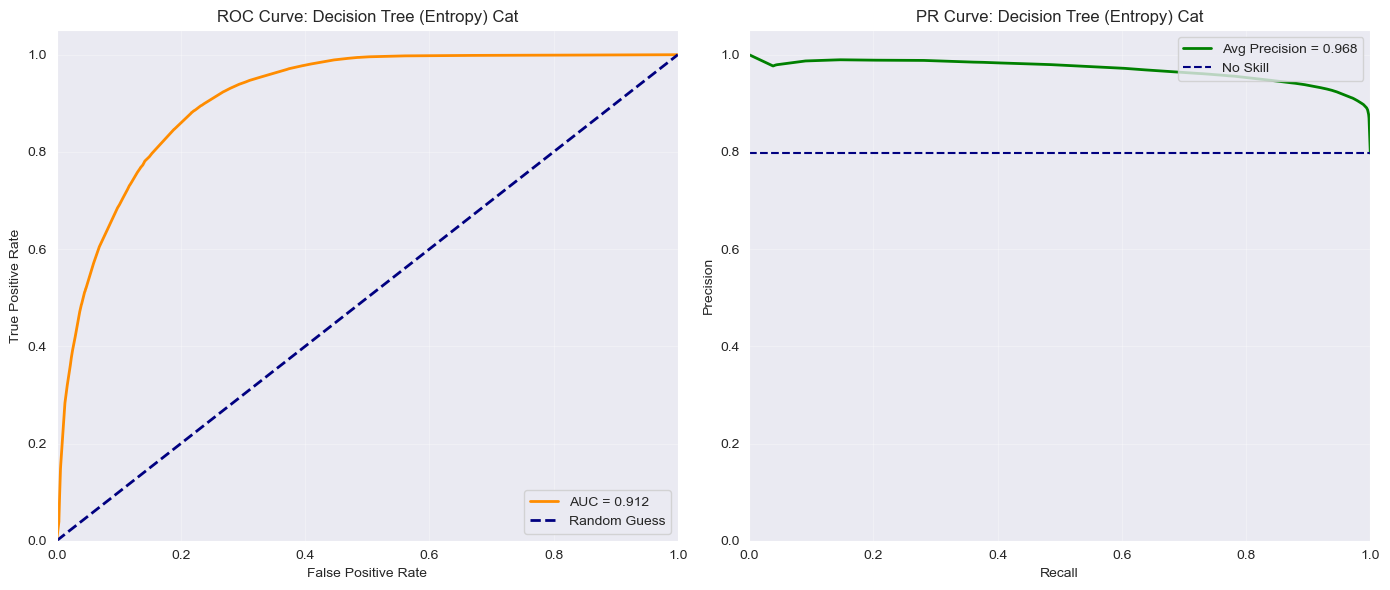

--- Decision Tree (Entropy) Full ---
Train Accuracy: 0.8346 | Train AUC: 0.9169
Test  Accuracy: 0.8633 | Test  AUC: 0.9120
✅ Model seems balanced
------------------------------


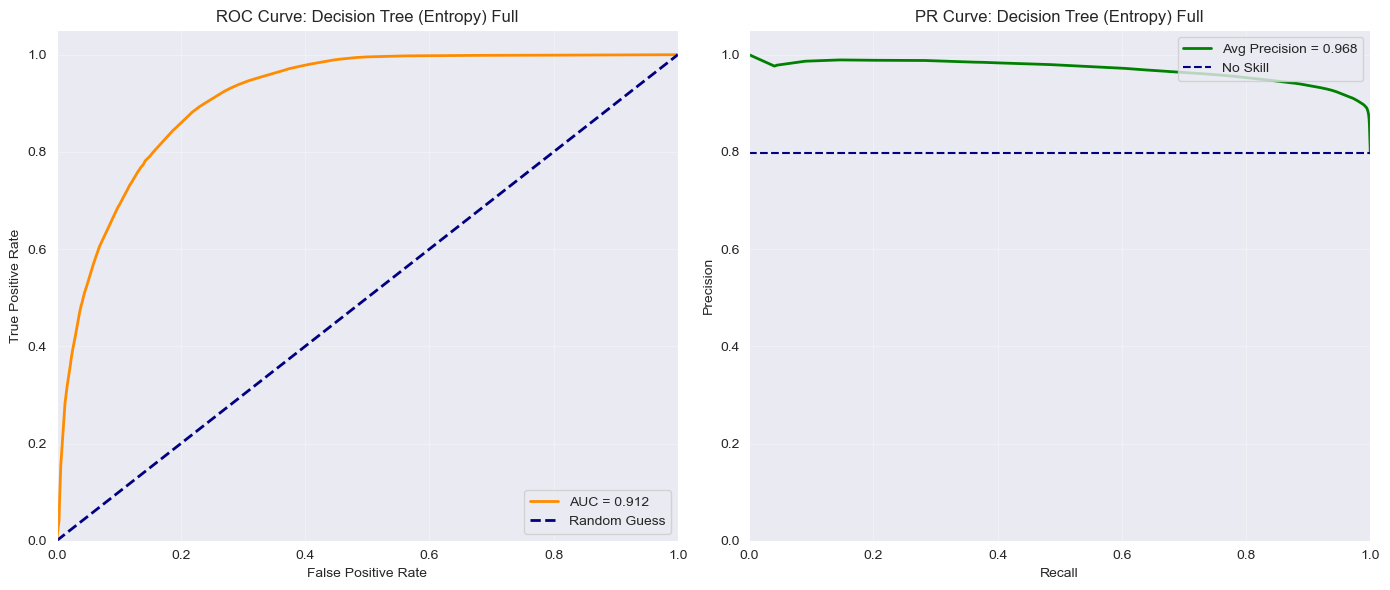

In [16]:
from sklearn.tree import DecisionTreeClassifier

results = []

dt_entropy_cat = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)
results.append(
    evaluate_and_graph(dt_entropy_cat, X_train_cat, y_train, X_test_cat, y_test, "Decision Tree (Entropy) Cat", True)
)

dt_entropy_full = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)
results.append(
    evaluate_and_graph(dt_entropy_full, X_train_full, y_train, X_test_full, y_test, "Decision Tree (Entropy) Full", True)
)

# Random Forest Classifier Model

--- Random Forest Cat ---
Train Accuracy: 0.8321 | Train AUC: 0.9155
Test  Accuracy: 0.8699 | Test  AUC: 0.9130
✅ Model seems balanced
------------------------------


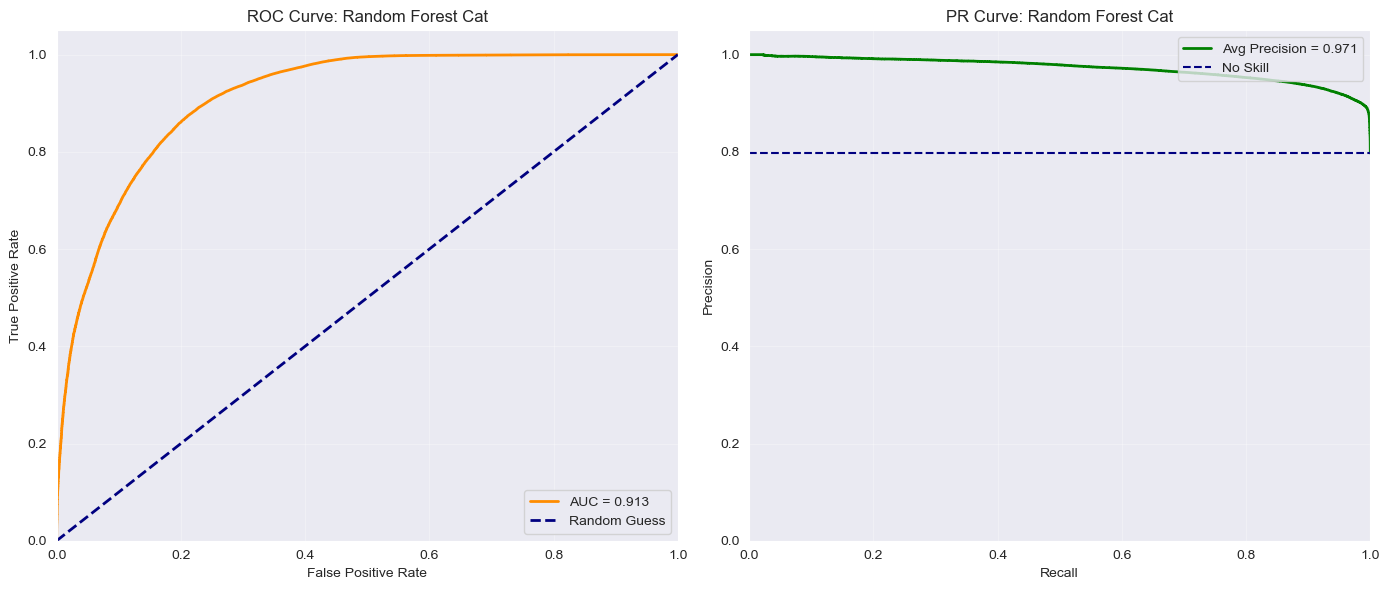

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf_cat = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
results.append(
    evaluate_and_graph(rf_cat, X_train_cat, y_train, X_test_cat, y_test, "Random Forest Cat", True)
)

# Gradient Boosting Classifier Model

--- Gradient Boosting Cat ---
Train Accuracy: 0.8329 | Train AUC: 0.9155
Test  Accuracy: 0.8620 | Test  AUC: 0.9164
✅ Model seems balanced
------------------------------


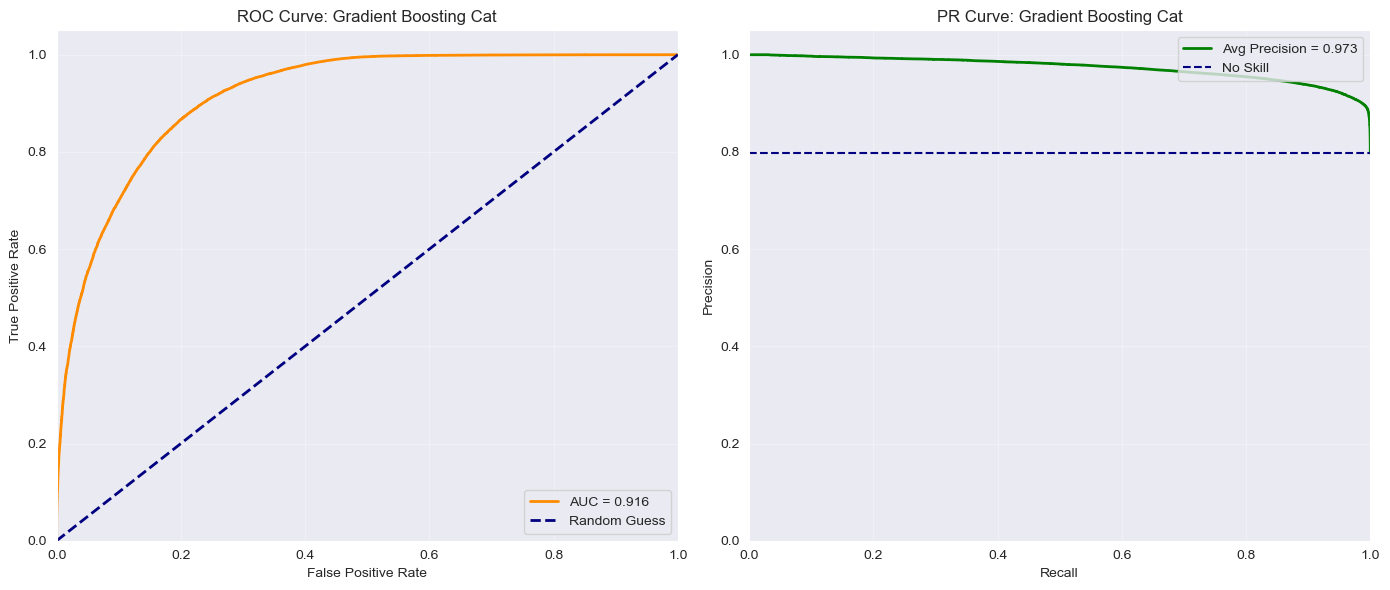

--- Gradient Boosting Full ---
Train Accuracy: 0.8329 | Train AUC: 0.9155
Test  Accuracy: 0.8622 | Test  AUC: 0.9164
✅ Model seems balanced
------------------------------


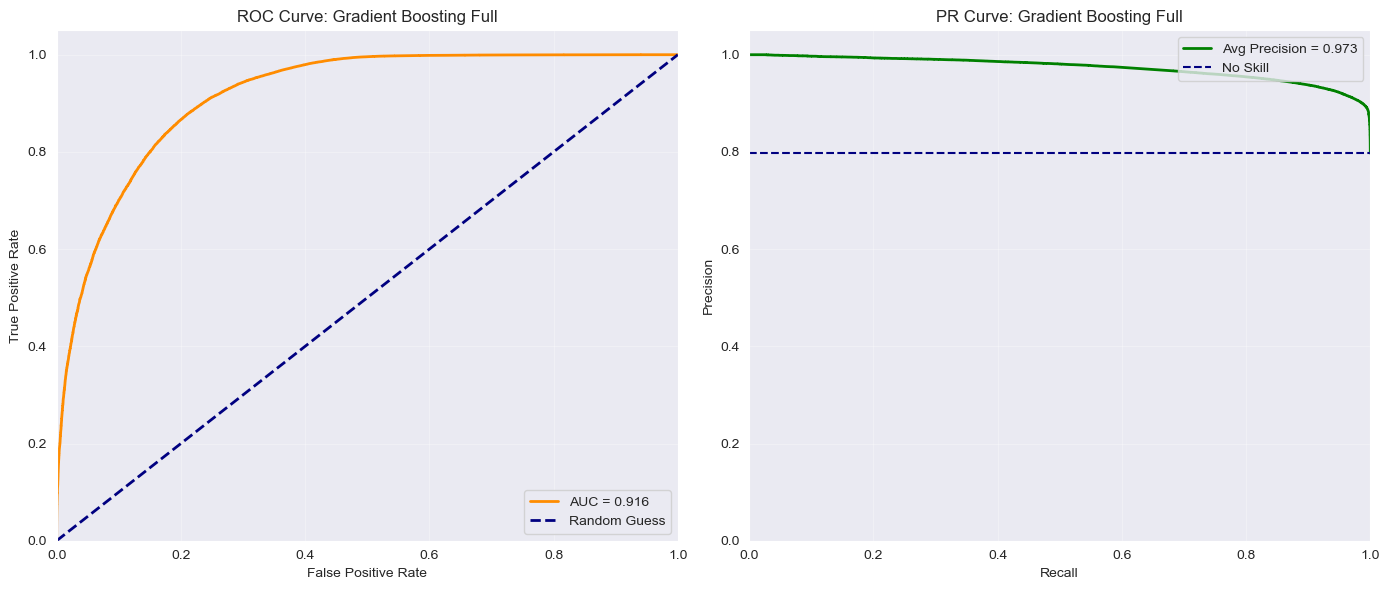

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

gb_cat = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
results.append(
    evaluate_and_graph(gb_cat, X_train_cat, y_train, X_test_cat, y_test, "Gradient Boosting Cat", True)
)

gb_full = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
results.append(
    evaluate_and_graph(gb_full, X_train_full, y_train, X_test_full, y_test, "Gradient Boosting Full", True)
)

# Gradient Boosting Classifier Model Cat with Hyperparameter Tuning

Because this was the best model, I want to use hyperparameters to try to get an even better result

In [19]:
best_gb_model_cat = GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=5,
    n_estimators=200,
    random_state=42,
    validation_fraction=0.1,
    n_iter_no_change=10,
    tol=1e-4
)

best_gb_model_cat.fit(X_train_cat, y_train)

results.append(
    evaluate_and_graph(
        best_gb_model_cat,
        X_train_cat, y_train,
        X_test_cat, y_test,
        "Gradient Boosting (Tuned) Cat",
        True
    )
)

--- Gradient Boosting Full (Tuned) Cat ---
Train Accuracy: 0.8432 | Train AUC: 0.9254
Test  Accuracy: 0.8673 | Test  AUC: 0.9214
✅ Model seems balanced
------------------------------


Best model: 'learning_rate': 0.1, 'max_depth': None, 'max_iter': 300, 'max_leaf_nodes': 63, 'min_samples_leaf': 10

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': None, 'max_iter': 300, 'max_leaf_nodes': 63, 'min_samples_leaf': 10}
Best Score: 0.9311145826060097
--- HistGradient Boosting Full (Tuned) Cat ---
Train Accuracy: 0.8474 | Train AUC: 0.9350
Test  Accuracy: 0.8687 | Test  AUC: 0.9197
✅ Model seems balanced
------------------------------


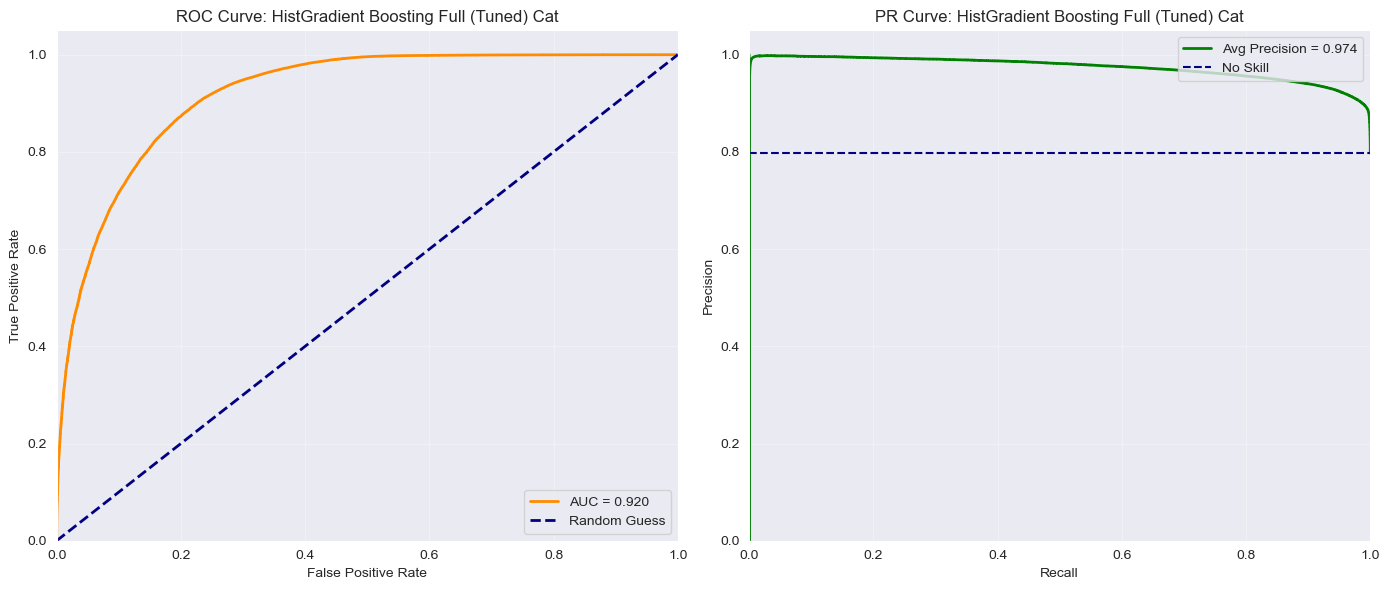

In [25]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

gb_cat = HistGradientBoostingClassifier(random_state=42)

param_grid = {
    'max_iter': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [None, 3, 5],
    'max_leaf_nodes': [31, 63],
    'min_samples_leaf': [5, 10],
}

grid_search_cat = GridSearchCV(
    estimator=gb_cat,
    param_grid=param_grid,
    cv=3,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1
)

grid_search_cat.fit(X_train_cat, y_train)

print("Best Parameters:", grid_search_cat.best_params_)
print("Best Score:", grid_search_cat.best_score_)

best_model = grid_search_cat.best_estimator_

results.append(
    evaluate_and_graph(best_model, X_train_cat, y_train, X_test_cat, y_test, "HistGradient Boosting (Tuned) Cat", True)
)

# Result

In [21]:
def pick_best_model(dataframe, overfit_threshold=0.05):
    if dataframe is None or dataframe.empty:
        print("No models provided (empty DataFrame).")
        return None

    df = dataframe.copy()

    df['overfitting_gap'] = df['train_auc'] - df['auc']
    df['is_overfit'] = df['overfitting_gap'] > overfit_threshold

    df_valid = df[df['is_overfit'] == False].copy()
    df_overfit = df[df['is_overfit'] == True].copy()

    print(f"Total Models: {len(df)}")
    print(f"Valid Models: {len(df_valid)}")
    print(f"Disqualified Models: {len(df_overfit)}")

    if not df_overfit.empty:
        print("\n⚠️ The following models were disqualified due to overfitting:")
        display(df_overfit[['model', 'accuracy', 'auc', 'train_auc', 'overfitting_gap']])
    else:
        print("\n✅ No models were disqualified for overfitting.")

    if df_valid.empty:
        print("\n⚠️ All models are overfitting (by the chosen threshold).")
        print("Falling back to ranking ALL models by AUC.")
        df_valid = df.copy()

    print("Best by Accuracy:")
    display(df_valid.sort_values(by="accuracy", ascending=False).head(1))

    print("Best by AUC:")
    display(df_valid.sort_values(by="auc", ascending=False).head(1))

    print("Best by Average Precision:")
    display(df_valid.sort_values(by="average_precision", ascending=False).head(1))

    df_valid_ranked = df_valid.copy()
    df_valid_ranked["rank_acc"] = df_valid["accuracy"].rank(ascending=False)
    df_valid_ranked["rank_auc"] = df_valid["auc"].rank(ascending=False)
    df_valid_ranked["rank_ap"] = df_valid["average_precision"].rank(ascending=False)


    final_ranking = df_valid_ranked.sort_values(
        by=["rank_auc", "rank_acc", "rank_ap"]
    )

    cols = ['model', 'accuracy', 'auc', 'average_precision', 'overfitting_gap']
    print("\nFinal ranking (higher = better):")
    display(final_ranking[cols])

    best_model_row = final_ranking.iloc[0]
    best_model_name = best_model_row['model']
    print(f"\n🏆 Best model: {best_model_name}")

    return best_model_name

In [26]:
df = pd.DataFrame(results)
best_model = pick_best_model(df, overfit_threshold=0.05)

Total Models: 8
Valid Models: 8
Disqualified Models: 0

✅ No models were disqualified for overfitting.
Best by Accuracy:


,model,accuracy,auc,average_precision,train_accuracy,train_auc,overfitting_gap,is_overfit
2,Random Forest Cat,0.869887,0.913046,0.971489,0.832075,0.915454,0.002408,False


Best by AUC:


,model,accuracy,auc,average_precision,train_accuracy,train_auc,overfitting_gap,is_overfit
5,Gradient Boosting Full (Tuned) Cat,0.867261,0.921377,0.974728,0.843193,0.925433,0.004056,False


Best by Average Precision:


,model,accuracy,auc,average_precision,train_accuracy,train_auc,overfitting_gap,is_overfit
5,Gradient Boosting Full (Tuned) Cat,0.867261,0.921377,0.974728,0.843193,0.925433,0.004056,False



Final ranking (higher = better):


,model,accuracy,auc,average_precision,overfitting_gap
5,Gradient Boosting Full (Tuned) Cat,0.867261,0.921377,0.974728,0.004056
6,HistGradient Boosting Full (Tuned) Cat,0.865964,0.919912,0.974329,0.003953
7,HistGradient Boosting Full (Tuned) Cat,0.868742,0.919675,0.973849,0.015277
3,Gradient Boosting Cat,0.861997,0.916442,0.973057,-0.000921
4,Gradient Boosting Full,0.862244,0.916409,0.973046,-0.000901
2,Random Forest Cat,0.869887,0.913046,0.971489,0.002408
0,Decision Tree (Entropy) Cat,0.862979,0.912071,0.968335,0.004775
1,Decision Tree (Entropy) Full,0.863265,0.911961,0.968231,0.004926



🏆 Best model: Gradient Boosting Full (Tuned) Cat


# Submission for Kaggle

Because I am lazy, this is manually done... so yeah. Didn't make a function to automatically do this

In [23]:
testing_scaled_num = scaler.transform(testing[numerical_vars])
testing_scaled_df = pd.DataFrame(
    testing_scaled_num,
    columns=numerical_vars,
    index=testing.index
)

testing_cat_dummies = pd.get_dummies(testing[categorical_vars], drop_first=True)

_, testing_encoded_aligned = X_train_encoded_cat.align(
    testing_cat_dummies,
    join='left',
    axis=1,
    fill_value=0
)

testing_cat_final = pd.concat([testing_scaled_df, testing_encoded_aligned], axis=1)

print(f"Training shape: {X_train_cat.shape}")
print(f"Testing shape:  {testing_cat_final.shape}")

Training shape: (664784, 25)
Testing shape:  (254569, 25)


In [24]:
#predictions = best_gb_model_cat.predict_proba(testing_cat_final)[:, 1]

submission = pd.DataFrame({
    'id': testing.index,
    'loan_paid_back': predictions
})

# 7. Save to CSV
submission.to_csv('submission_best.csv', index=False)

print("Submission saved successfully!")
submission.head()

NameError: name 'predictions' is not defined